# fa/P1

In [52]:
import pandas as pd
df = pd.read_csv("../../Data/embedding_matrix_1025_fap1.csv",index_col=0)
df.head()

,ENSG00000223764.2,ENSG00000187634.12,ENSG00000188976.11,ENSG00000187961.14,ENSG00000215790.7,ENSG00000157933.10,ENSG00000287356.1,ENSG00000149527.18,ENSG00000197921.6,ENSG00000142611.17,...,ENSG00000182492.16,ENSG00000130822.15,ENSG00000101986.12,ENSG00000184216.14,ENSG00000169057.23,ENSG00000007350.17,ENSG00000196924.18,ENSG00000013563.14,ENSG00000160211.19,Role
4,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,2,1,1,1,1,fa
6,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,2,1,1,1,1,p1
19,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,2,1,1,1,1,fa
21,1,1,0,1,1,1,1,1,0,1,...,1,1,1,1,2,1,1,1,1,p1
31,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,2,1,1,1,1,fa


In [53]:
import pandas as pd
import scipy.stats as stats

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'p1'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'p1'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio
        odds_ratio, p_value = stats.fisher_exact(contingency_table)
        odds_ratios[node] = odds_ratio
    else:
        # Skip nodes where the contingency table is not 2x2
        #print(f"Skipping node {node} due to incomplete contingency table")
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio'])
print(odds_ratios_df)


                    Node  Odds Ratio
0      ENSG00000223764.2         inf
1     ENSG00000187634.12         inf
2     ENSG00000188976.11    1.113440
3     ENSG00000187961.14         inf
4      ENSG00000215790.7    2.088235
...                  ...         ...
2591  ENSG00000169057.23    4.187668
2592  ENSG00000007350.17         inf
2593  ENSG00000196924.18         inf
2594  ENSG00000013563.14    3.136546
2595  ENSG00000160211.19         inf

[2596 rows x 2 columns]


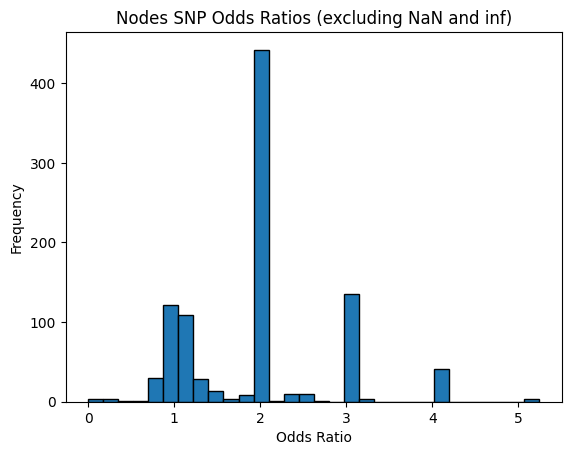

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios (excluding NaN and inf)')
plt.show()


In [60]:
greaterThan2

,Node,Odds Ratio
4,ENSG00000215790.7,2.088235
6,ENSG00000287356.1,2.617450
19,ENSG00000237402.1,2.088235
21,ENSG00000171612.7,2.088235
22,ENSG00000284642.1,2.088235
...,...,...
2582,ENSG00000147274.14,2.088235
2585,ENSG00000013619.14,2.617450
2590,ENSG00000184216.14,2.088235
2591,ENSG00000169057.23,4.187668


In [63]:
odds_ratios_df.index = odds_ratios_df['Node']

In [67]:
greaterThan2 = odds_ratios_df[(odds_ratios_df['Odds Ratio'] > 5) & (odds_ratios_df['Odds Ratio'] < 10)]
for nodeName in greaterThan2['Node']:
    print(f"Node:{nodeName}: Odds Ratio: {odds_ratios_df.loc[nodeName,'Odds Ratio']}")
    display(pd.crosstab(df_binary['Role'], df_binary[nodeName]))

Node:ENSG00000163281.12: Odds Ratio: 5.241610738255034


ENSG00000163281.12,0,1
Role,,
fa,5,745
p1,1,781


Node:ENSG00000186130.5: Odds Ratio: 5.241610738255034


ENSG00000186130.5,0,1
Role,,
fa,5,745
p1,1,781


Node:ENSG00000023608.5: Odds Ratio: 5.241610738255034


ENSG00000023608.5,0,1
Role,,
fa,5,745
p1,1,781


In [76]:
df['ENSG00000186130.5'].unique()

array([2, 0])

# p1 / fa

In [46]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Step 1: Convert non-zero values to 1, keep 0 as is
df_binary = df.copy()
node_columns = [col for col in df.columns if col not in ['SFARI ID', 'Repository Id','Role','ASD']]  # Assuming all columns except 'Role' are node columns
df_binary[node_columns] = (df_binary[node_columns] > 0).astype(int)  # Convert to binary (0 or 1)

# Step 2: Calculate odds ratio for each node
odds_ratios = {}

for node in node_columns:
    # Create a contingency table for 'fa' and 'p1'
    contingency_table = pd.crosstab(df_binary['Role'], df_binary[node])

    # Check if the table has both 0 and 1 for both 'fa' and 'p1'
    if contingency_table.shape == (2, 2):
        # Calculate the odds ratio (p1/fa)
        odds_ratio, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        
        # Avoid division by zero
        if odds_ratio == 0:
            odds_ratios[node] = np.inf  # Assign infinity if odds_ratio is zero
        else:
            odds_ratios[node] = 1 / odds_ratio  # This gives you p1/fa
    else:
        # Skip nodes where the contingency table is not 2x2
        odds_ratios[node] = None  # Or handle however you'd prefer

# Display the odds ratios
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['Node', 'Odds Ratio (p1/fa)'])
print(odds_ratios_df)


                    Node  Odds Ratio (p1/fa)
0      ENSG00000223764.2            0.000000
1     ENSG00000187634.12            0.000000
2     ENSG00000188976.11            0.898117
3     ENSG00000187961.14            0.000000
4      ENSG00000215790.7            0.478873
...                  ...                 ...
2591  ENSG00000169057.23            0.238796
2592  ENSG00000007350.17            0.000000
2593  ENSG00000196924.18            0.000000
2594  ENSG00000013563.14            0.318822
2595  ENSG00000160211.19            0.000000

[2596 rows x 2 columns]


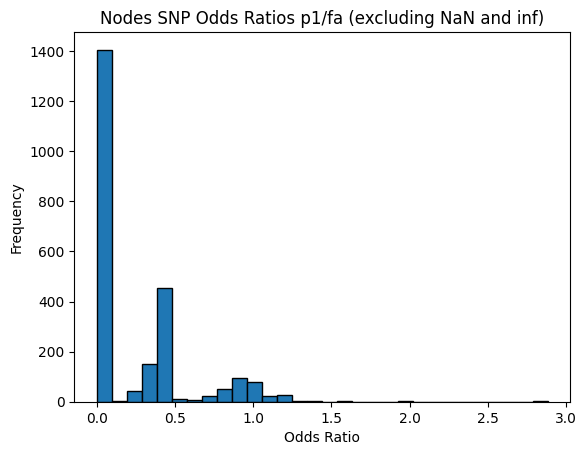

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN and infinite values
filtered_odds_ratios = odds_ratios_df['Odds Ratio (p1/fa)'].replace([np.inf, -np.inf], np.nan).dropna()

# Plot the histogram
plt.hist(filtered_odds_ratios, bins=30, edgecolor='black')
plt.xlabel('Odds Ratio')
plt.ylabel('Frequency')
plt.title('Nodes SNP Odds Ratios p1/fa (excluding NaN and inf)')
plt.show()


In [48]:
greaterThan2 = odds_ratios_df[(odds_ratios_df['Odds Ratio (p1/fa)'] > 2) & (odds_ratios_df['Odds Ratio (p1/fa)'] < 10)]
odds_ratios_df.index = odds_ratios_df['Node']

In [49]:
odds_ratios_df

,Node,Odds Ratio (p1/fa)
Node,,
ENSG00000223764.2,ENSG00000223764.2,0.000000
ENSG00000187634.12,ENSG00000187634.12,0.000000
ENSG00000188976.11,ENSG00000188976.11,0.898117
ENSG00000187961.14,ENSG00000187961.14,0.000000
ENSG00000215790.7,ENSG00000215790.7,0.478873
...,...,...
ENSG00000169057.23,ENSG00000169057.23,0.238796
ENSG00000007350.17,ENSG00000007350.17,0.000000
ENSG00000196924.18,ENSG00000196924.18,0.000000


In [50]:
nodeName

'ENSG00000177485.7'

# List of high odds ratio p1/fa

In [51]:
for nodeName in greaterThan2['Node']:
    print(f"Node:{nodeName}: Odds Ratio: {odds_ratios_df.loc[nodeName,'Odds Ratio (p1/fa)']}")
    display(pd.crosstab(df_binary['Role'], df_binary[nodeName]))

Node:ENSG00000158711.14: Odds Ratio: 2.884467265725289


ENSG00000158711.14,0,1
Role,,
fa,1,749
p1,3,779


Node:ENSG00000109771.15: Odds Ratio: 2.884467265725289


ENSG00000109771.15,0,1
Role,,
fa,1,749
p1,3,779


Node:ENSG00000059915.17: Odds Ratio: 2.884467265725289


ENSG00000059915.17,0,1
Role,,
fa,1,749
p1,3,779


Node:ENSG00000167483.18: Odds Ratio: 2.884467265725289


ENSG00000167483.18,0,1
Role,,
fa,1,749
p1,3,779
